## Importing packages

In [1]:
import numpy as np
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout

## Reading and Pre-processing image files

In [2]:
images = []
labels = []
classes = 43

current_path = 'GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/'

for i in range(classes):
    path = os.path.join(current_path, str(str(i).zfill(5)))
    img_folder = os.listdir(path)
    for j in img_folder:
        try:
            image = cv.imread(str(path+'/'+j))
            image = cv.resize(image, (32, 32))
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            image = np.array(image)
            images.append(image)
            label = np.zeros(classes)
            label[i] = 1.0
            labels.append(label)
        except:
            pass

## Feature Scaling or Normalisation

In [3]:
images = np.array(images)
images = images/255
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (39209, 32, 32)
Labels shape: (39209, 43)


## Splitting dataset into Train and Test Subset

In [4]:
X = images.astype(np.float32)
y = labels.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (31367, 32, 32)
y_train shape: (31367, 43)
X_test shape: (7842, 32, 32)
y_test shape: (7842, 43)


## Plotting the Image

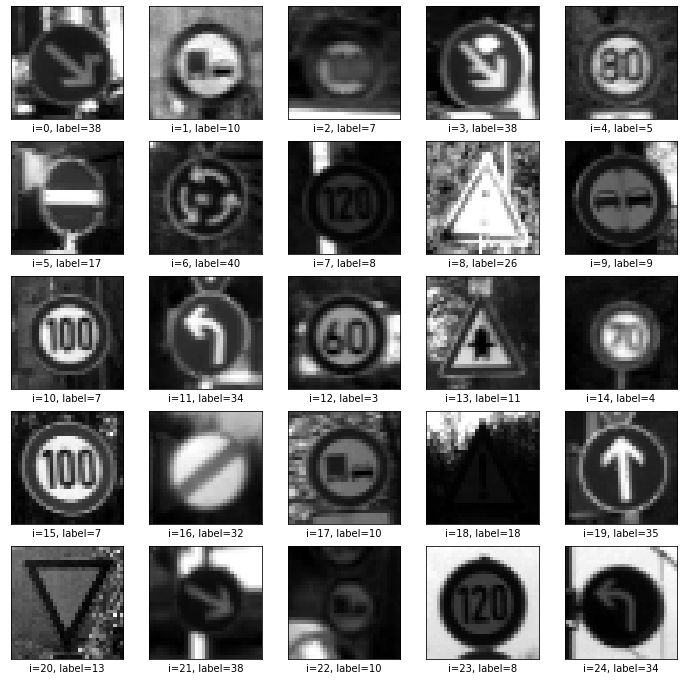

In [5]:
plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(X_train[start_index+i], cmap='gray')
plt.show()

## Building a LeNet Model

In [6]:
# Building the model
model = Sequential([
    Rescaling(1, input_shape=(32, 32, 1)),
    Conv2D(filters=6, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=120, kernel_size=(5, 5), activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(units=120, activation='relu'),
    Dense(units=43, activation='softmax')
])

# Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         4

## Training the Model

In [7]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
981/981 [==============================] - 13s 9ms/step - loss: 1.7443 - accuracy: 0.5065 - val_loss: 0.6208 - val_accuracy: 0.8178
Epoch 2/50
981/981 [==============================] - 9s 9ms/step - loss: 0.6029 - accuracy: 0.8169 - val_loss: 0.4030 - val_accuracy: 0.8822
Epoch 3/50
981/981 [==============================] - 10s 10ms/step - loss: 0.4085 - accuracy: 0.8767 - val_loss: 0.2555 - val_accuracy: 0.9290
Epoch 4/50
981/981 [==============================] - 9s 10ms/step - loss: 0.3058 - accuracy: 0.9070 - val_loss: 0.1883 - val_accuracy: 0.9480
Epoch 5/50
981/981 [==============================] - 9s 9ms/step - loss: 0.2443 - accuracy: 0.9262 - val_loss: 0.1418 - val_accuracy: 0.9597
Epoch 6/50
981/981 [==============================] - 9s 9ms/step - loss: 0.2066 - accuracy: 0.9365 - val_loss: 0.1200 - val_accuracy: 0.9672
Epoch 7/50
981/981 [==============================] - 9s 10ms/step - loss: 0.1744 - accuracy: 0.9478 - val_loss: 0.0987 - val_accuracy: 0.9718
E

## Evaluating the trained results

In [8]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nValifdation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

246/246 - 1s - loss: 0.0406 - accuracy: 0.9923 - 916ms/epoch - 4ms/step

Valifdation accuracy: 0.9923489093780518

Validation loss: 0.040560975670814514


## Plotting Accuarcy and Error curve for train and test set

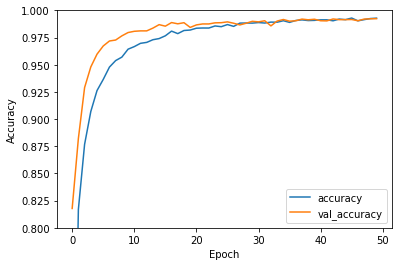

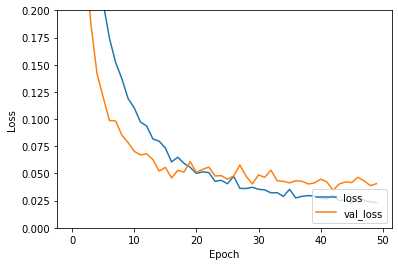

In [9]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='lower right')

## Prediction for Samples

246/246 [==============================] - 1s 4ms/step


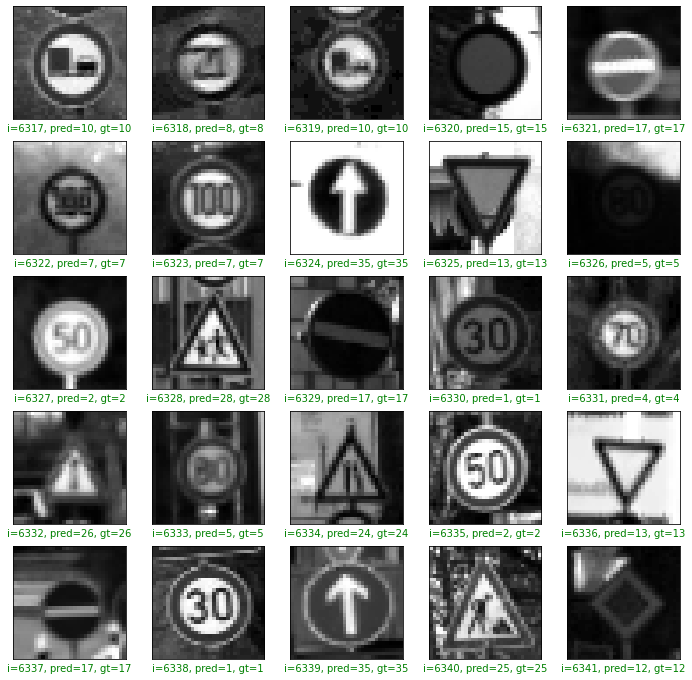

In [10]:
preds = model.predict(X_test)

plt.figure(figsize=(12, 12))
start_index = random.randint(0, 7800)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(X_test[start_index+i], cmap='gray')
plt.show()

## Save the Model

In [11]:
model.save('german_traffic_sign_model.h5')